In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [14]:
df = pd.read_csv(r"C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\data\Salesstore.csv")

In [15]:
df.head()

,Order_ID,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Customer_Name,Region,Customer_Segment,Product_Category,Product_Sub-Category,Product_Name,Product_Container
0,643,High,21,2781.82,Express Air,-695.26,Monica Federle,Nunavut,Corporate,Office Supplies,Storage & Organization,"SAFCO Commercial Wire Shelving, Black",Large Box
1,8995,High,35,3389.93,Express Air,737.94,Beth Paige,Northwest Territories,Consumer,Furniture,Office Furnishings,Luxo Professional Combination Clamp-On Lamps,Large Box
2,9127,Not Specified,7,2039.56,Express Air,-329.49,Bryan Davis,Northwest Territories,Corporate,Office Supplies,Storage & Organization,"Tennsco Snap-Together Open Shelving Units, Sta...",Large Box
3,26272,Low,6,905.94,Express Air,-4.19,Carlos Daly,Northwest Territories,Home Office,Furniture,Chairs & Chairmats,Hon Olson Stacker Stools,Large Box
4,36646,Medium,24,1168.15,Express Air,-743.96,Muhammed MacIntyre,Northwest Territories,Small Business,Office Supplies,Storage & Organization,Tennsco Industrial Shelving,Large Box


In [16]:
df.drop(columns=["Order_ID","Customer_Name","Product_Name","Product_Sub-Category"],inplace=True)

In [17]:
df.shape

(730, 9)

In [18]:
print("DataFrame shape:", df.shape)

DataFrame shape: (730, 9)


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Priority     730 non-null    object 
 1   Order_Quantity     730 non-null    int64  
 2   Sales              730 non-null    float64
 3   Ship_Mode          730 non-null    object 
 4   Profit             730 non-null    float64
 5   Region             730 non-null    object 
 6   Customer_Segment   730 non-null    object 
 7   Product_Category   730 non-null    object 
 8   Product_Container  730 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 51.5+ KB


In [20]:
df.describe()

,Order_Quantity,Sales,Profit
count,730.000000,730.000000,730.000000
mean,24.857534,1502.777653,207.479233
std,14.182970,2893.936648,878.631028
min,1.000000,8.600000,-4437.910000
25%,13.000000,171.098375,-77.132500
50%,25.000000,438.700000,0.035000
75%,37.000000,1480.855000,180.000000
max,50.000000,27663.920000,8417.570000


In [21]:
df.corr()

C:\Users\Rohan\AppData\Local\Temp\ipykernel_24004\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Order_Quantity,Sales,Profit
Order_Quantity,1.000000,0.204255,0.197149
Sales,0.204255,1.000000,0.595711
Profit,0.197149,0.595711,1.000000


In [22]:
df.head(3)

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Container
0,High,21,2781.82,Express Air,-695.26,Nunavut,Corporate,Office Supplies,Large Box
1,High,35,3389.93,Express Air,737.94,Northwest Territories,Consumer,Furniture,Large Box
2,Not Specified,7,2039.56,Express Air,-329.49,Northwest Territories,Corporate,Office Supplies,Large Box


In [23]:
df.to_csv(r'C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\data\preprocess_data\final.csv', index=False)


In [24]:
print('duplicated :',df.duplicated().sum())
print(" - "*10)
print('null values :',df.isnull().sum().sum())

duplicated : 0
 -  -  -  -  -  -  -  -  -  - 
null values : 0


In [25]:
df.groupby("Product_Category")["Profit"].agg(["max","sum"]).sort_values("sum",ascending=False)

,max,sum
Product_Category,,
Technology,7416.43,81368.05
Office Supplies,8417.57,53073.95
Furniture,3387.35,17017.84


In [26]:
df['Product_Category'].value_counts()

Office Supplies    447
Technology         185
Furniture           98
Name: Product_Category, dtype: int64

In [27]:
pd.set_option('display.max_columns', 100)

In [28]:
pd.set_option('display.max_rows', 100)

In [29]:
valuecounts_col = df.select_dtypes(include=['object']).columns

for value in valuecounts_col:
    a = df[value].value_counts()
    print('Column name:', value)
    print(' ' * 15)
    print(a)
    print(' - ' * 15)

Column name: Order_Priority
               
Not Specified    156
High             152
Low              147
Critical         147
Medium           128
Name: Order_Priority, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Column name: Ship_Mode
               
Regular Air    579
Express Air    151
Name: Ship_Mode, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Column name: Region
               
West                     232
Atlantic                 170
Northwest Territories    150
Prarie                    79
Ontario                   67
Nunavut                   32
Name: Region, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Column name: Customer_Segment
               
Corporate         518
Consumer          153
Home Office        31
Small Business     28
Name: Customer_Segment, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
Column name: Product_Category
               
Office Supplies    447
Technology         185
Furniture           98
Na

In [30]:
# label_encoder = LabelEncoder()
# for column in df.select_dtypes(include=['object']).columns:
#     df[column] = label_encoder.fit_transform(df[column])

In [31]:
categorical_cols = df.select_dtypes(include=['object']).columns

mappings = {
    'Order_Priority': {'Not Specified': 0, 'High': 1, 'Low': 2, 'Critical': 3, 'Medium': 4},
    'Ship_Mode': {'Regular Air': 0, 'Express Air': 1},
    'Region': {'West': 0, 'Atlantic': 1, 'Northwest Territories': 2, 'Prarie': 3, 'Ontario': 4, 'Nunavut': 5},
    'Customer_Segment': {'Corporate': 0, 'Consumer': 1, 'Home Office': 2, 'Small Business': 3},
    'Product_Category': {'Office Supplies': 0, 'Technology': 1, 'Furniture': 2},
    'Product_Container': {'Small Box': 0, 'Large Box': 1, 'Medium Box': 2}
}

# Apply the mappings to each column
for col in categorical_cols:
    df[col] = df[col].map(mappings[col])

In [32]:
df.head()

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Container
0,1,21,2781.82,1,-695.26,5,0,0,1
1,1,35,3389.93,1,737.94,2,1,2,1
2,0,7,2039.56,1,-329.49,2,0,0,1
3,2,6,905.94,1,-4.19,2,2,2,1
4,4,24,1168.15,1,-743.96,2,3,0,1


In [33]:
df.to_csv(r'C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\data\preprocess_data\after_labels.csv', index=False)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order_Priority     730 non-null    int64  
 1   Order_Quantity     730 non-null    int64  
 2   Sales              730 non-null    float64
 3   Ship_Mode          730 non-null    int64  
 4   Profit             730 non-null    float64
 5   Region             730 non-null    int64  
 6   Customer_Segment   730 non-null    int64  
 7   Product_Category   730 non-null    int64  
 8   Product_Container  730 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 51.5 KB


In [35]:
# df['Order_Priority'].astype(float)

#### Check for Outliers: If your data contains outliers, Robust scaling might be a good choice.
#### Algorithm Requirements: If you are using algorithms that assume normally distributed data (e.g., linear regression), Standard scaling is often preferred.
#### Feature Range: If your algorithm requires bounded input (e.g., neural networks), Min-Max scaling is appropriate.

<Figure size 1200x600 with 0 Axes>

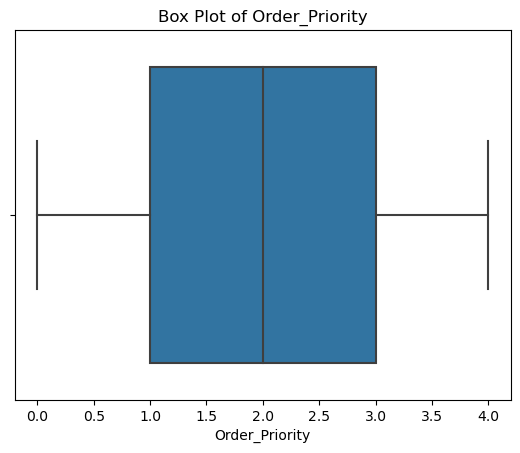

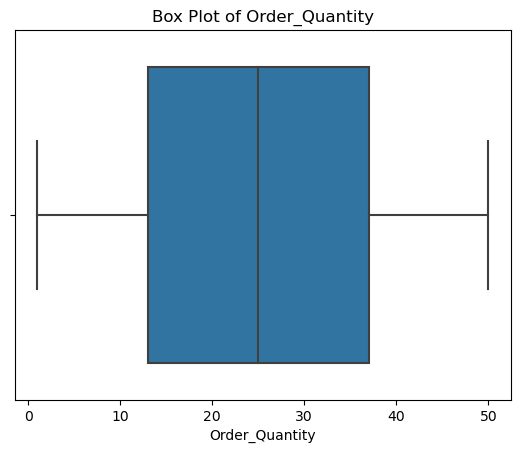

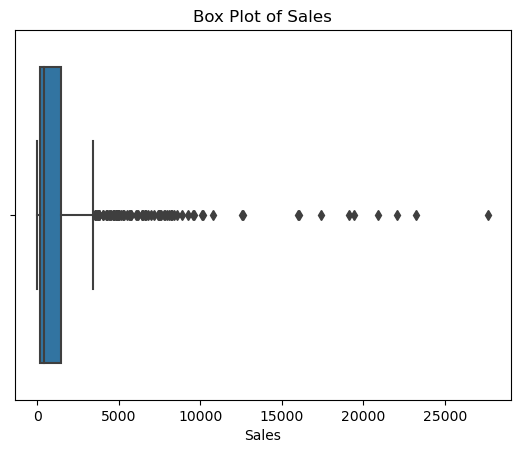

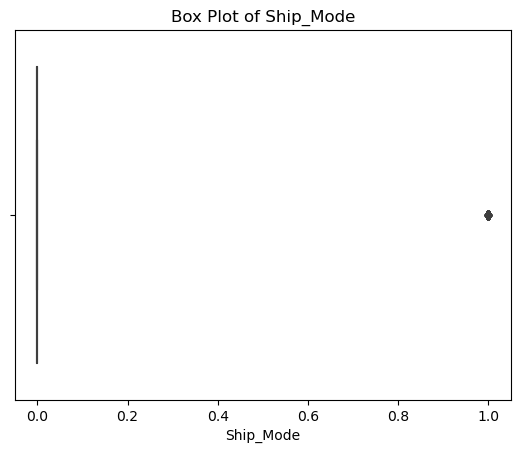

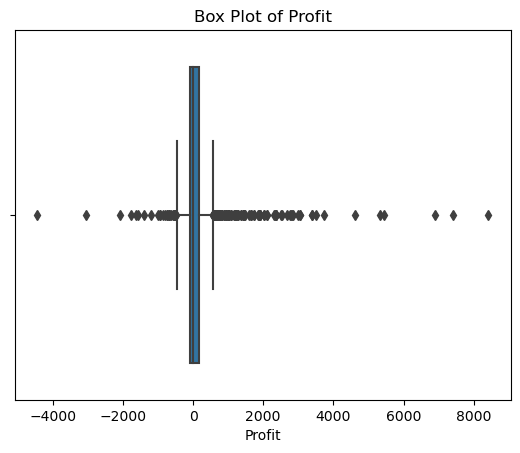

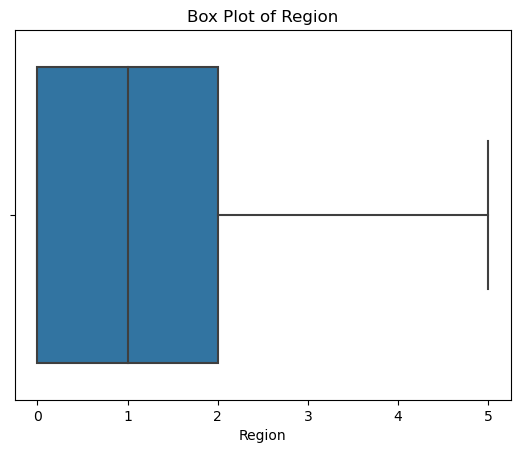

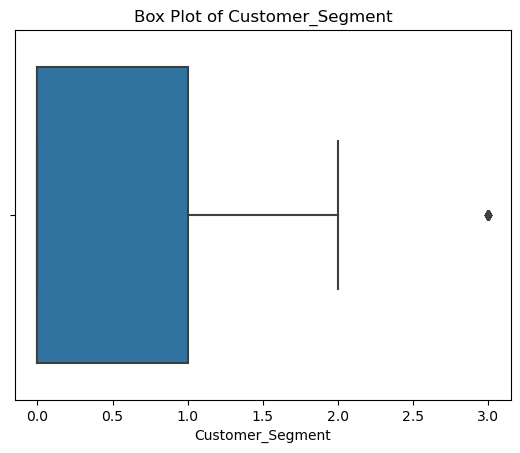

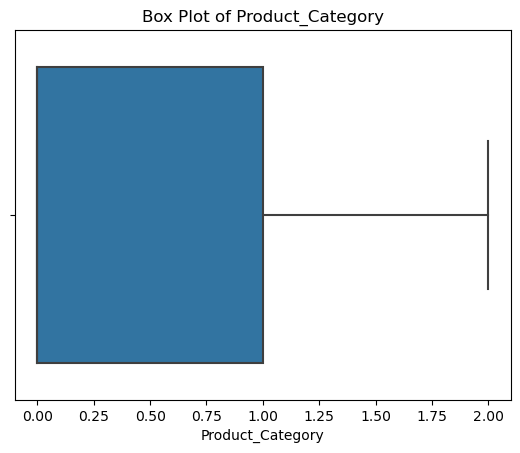

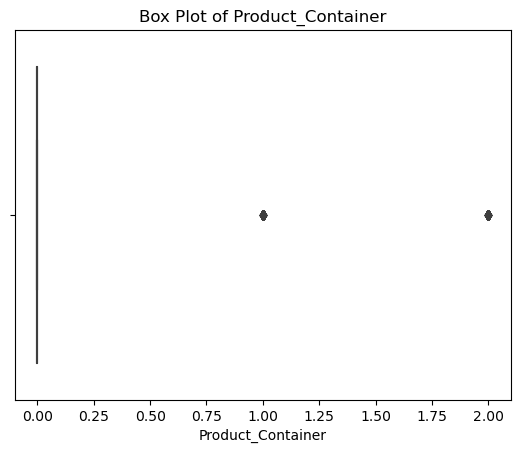

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

num_col = df.select_dtypes(include=['int', 'float']).columns

plt.figure(figsize=(12, 6))

for col in num_col:
    plt.figure()  
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [37]:
df.head()

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Container
0,1,21,2781.82,1,-695.26,5,0,0,1
1,1,35,3389.93,1,737.94,2,1,2,1
2,0,7,2039.56,1,-329.49,2,0,0,1
3,2,6,905.94,1,-4.19,2,2,2,1
4,4,24,1168.15,1,-743.96,2,3,0,1


In [38]:
df.columns

Index(['Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode', 'Profit',
       'Region', 'Customer_Segment', 'Product_Category', 'Product_Container'],
      dtype='object')

In [39]:
# from sklearn.preprocessing import RobustScaler
# numerical_cols = ['Order_Priority', 'Order_Quantity', 'Sales', 'Ship_Mode', 
#        'Region', 'Customer_Segment', 'Product_Category', 'Product_Container']

# # Apply RobustScaler to the selected numerical columns
# robust_scaler = RobustScaler()
# df[numerical_cols] = robust_scaler.fit_transform(df[numerical_cols])

In [40]:
from sklearn.preprocessing import RobustScaler,StandardScaler

robust_scaler = RobustScaler() 
df['Sales'] = robust_scaler.fit_transform(df[['Sales']])
# df['Order_Quantity'] = robust_scaler.fit_transform(df[['Order_Quantity']])


In [41]:
from sklearn.model_selection import train_test_split

X = df.drop(columns='Profit')
y = df['Profit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (657, 8)
X_test shape: (73, 8)
y_train shape: (657,)
y_test shape: (73,)


In [42]:
X_train.head()

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Region,Customer_Segment,Product_Category,Product_Container
97,1,47,0.474409,0,2,0,1,2
568,3,16,-0.279915,0,0,0,0,0
409,0,2,0.267462,0,2,0,0,0
23,4,34,1.793723,0,1,1,0,1
223,0,39,0.535641,1,3,0,2,0


In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
 
LinearRegression = LinearRegression() 
LinearRegression.fit(X_train, y_train) 
y_pred = LinearRegression.predict(X_test)
 
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

r2 = LinearRegression.score(X_test, y_test)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error: 107682.81876000439
Coefficient of Determination (R-squared): 0.6600350648302569


In [44]:
# Regressors
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Machine": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor()
}


# Train models and evaluate R² score
r2_scores = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    r2_scores.append({
        "Model": name,
        "Training R2 Score": train_r2,
        "Testing R2 Score": test_r2,
        "Difference": train_r2 - test_r2
    })

df_r2_scores = pd.DataFrame(r2_scores)
df_r2_scores = df_r2_scores.sort_values(by="Testing R2 Score", ascending=False).reset_index(drop=True)

df_r2_scores

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000785 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 293
[LightGBM] [Info] Number of data points in the train set: 657, number of used features: 8
[LightGBM] [Info] Start training from score 207.356956
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

,Model,Training R2 Score,Testing R2 Score,Difference
0,Gradient Boosting,0.950398,0.860283,0.090115
1,LightGBM,0.756598,0.819252,-0.062655
2,Random Forest,0.919845,0.806015,0.113830
3,XGBoost,0.999782,0.739479,0.260303
4,Lasso Regression,0.355365,0.662128,-0.306764
5,Ridge Regression,0.355390,0.660194,-0.304803
6,Linear Regression,0.355390,0.660035,-0.304645
7,Decision Tree,1.000000,0.600550,0.399450
8,K-Nearest Neighbors,0.567519,0.532412,0.035107
9,Support Vector Machine,-0.042455,-0.109568,0.067113


In [45]:
import optuna
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)
    subsample = trial.suggest_uniform('subsample', 0.8, 1.0)

    model = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        subsample=subsample,
        random_state=42
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return r2_score(y_test, y_pred)

# Create a study and optimize the objective function
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=500, timeout=600)

# Get the best model parameters
best_params = study.best_params

# Train the best model
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

# Calculate R² scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Display the results
results2 = {
    "Model": "Gradient Boosting (Tuned with Optuna)",
    "Training R2 Score": train_r2,
    "Testing R2 Score": test_r2,
    "Difference": train_r2 - test_r2,
    "Best Parameters": best_params
}

df_results2 = pd.DataFrame([results2])
print(best_params)
df_results2

[I 2024-08-10 20:49:39,681] A new study created in memory with name: no-name-b9020277-9c1b-413d-b803-75338abbf529
C:\Users\Rohan\AppData\Local\Temp\ipykernel_24004\73214430.py:4: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  learning_rate = trial.suggest_loguniform('learning_rate', 0.01, 0.2)
C:\Users\Rohan\AppData\Local\Temp\ipykernel_24004\73214430.py:8: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  subsample = trial.suggest_uniform('subsample', 0.8, 1.0)
[I 2024-08-10 20:49:39,784] Trial 0 finished with value: 0.7440688586787522 and parameters: {'n_estimators': 56, 'learning_rate': 0.12796915021695487, 'max_depth': 7, 'min_samples_split': 7, 'min_samples_leaf': 2, 'subsample': 0.82933

{'n_estimators': 167, 'learning_rate': 0.046992857326885636, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 4, 'subsample': 0.996431720995261}


,Model,Training R2 Score,Testing R2 Score,Difference,Best Parameters
0,Gradient Boosting (Tuned with Optuna),0.918411,0.924453,-0.006041,"{'n_estimators': 167, 'learning_rate': 0.04699..."


In [46]:
best_params

{'n_estimators': 167,
 'learning_rate': 0.046992857326885636,
 'max_depth': 3,
 'min_samples_split': 3,
 'min_samples_leaf': 4,
 'subsample': 0.996431720995261}

In [47]:
oppos ={'n_estimators': 114,
 'learning_rate': 0.06289569861813855,
 'max_depth': 3,
 'min_samples_split': 5,
 'min_samples_leaf': 4,
 'subsample': 0.98911510979868}

In [48]:
model = GradientBoostingRegressor(**best_params, random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(train_r2)
print(test_r2)

0.9184113575382318
0.9244527235904805


In [49]:
df.head()

,Order_Priority,Order_Quantity,Sales,Ship_Mode,Profit,Region,Customer_Segment,Product_Category,Product_Container
0,1,21,1.788974,1,-695.26,5,0,0,1
1,1,35,2.253266,1,737.94,2,1,2,1
2,0,7,1.222258,1,-329.49,2,0,0,1
3,2,6,0.356738,1,-4.19,2,2,2,1
4,4,24,0.556936,1,-743.96,2,3,0,1


In [50]:
reverse_Order_Priority = {'Not Specified': 0, 'High': 1, 'Low': 2, 'Critical': 3, 'Medium': 4}
reverse_Ship_Mode = {'Regular Air': 0, 'Express Air': 1}
reverse_Region = {'West': 0, 'Atlantic': 1, 'Northwest Territories': 2, 'Prarie': 3, 'Ontario': 4, 'Nunavut': 5}
reverse_Customer_Segment = {'Corporate': 0, 'Consumer': 1, 'Home Office': 2, 'Small Business': 3}
reverse_Product_Category = {'Office Supplies': 0, 'Technology': 1, 'Furniture': 2}
reverse_Product_Container = {'Small Box': 0, 'Large Box': 1, 'Medium Box': 2}

In [51]:
model.predict([[0	,7	,1.222258,	1	,	2,	0	,0,	1]])

c:\Users\Rohan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([-455.71056053])

In [56]:
import joblib

# Save robust_scaler
joblib.dump(robust_scaler, r'C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\model\robust_scaler.joblib')

# Save model
joblib.dump(model, r'C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\model\model.joblib')

['C:\\Users\\Rohan\\rohan ML\\all projects\\github\\-data_science_end_to_end_projects\\model\\model.joblib']

In [59]:
import pandas as pd
import joblib  # or pickle
from sklearn.preprocessing import RobustScaler

# Input values
Order_Priority = input('Enter Order Priority (e.g., Medium): ')
Order_Quantity = int(input('Enter Order Quantity: '))
Sales = float(input('Enter Sales: '))
Ship_Mode = input('Enter Ship Mode: ')
Region = input('Enter Region: ')
Customer_Segment = input('Enter Customer Segment: ')
Product_Category = input('Enter Product Category: ')
Product_Container = input('Enter Product Container: ')

# Create a dictionary with the input values
data = {
    'Order_Priority': [Order_Priority],
    'Order_Quantity': [Order_Quantity],
    'Sales': [Sales],
    'Ship_Mode': [Ship_Mode],
    'Region': [Region],
    'Customer_Segment': [Customer_Segment],
    'Product_Category': [Product_Category],
    'Product_Container': [Product_Container]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Reverse mappings
reverse_Order_Priority = {'Not Specified': 0, 'High': 1, 'Low': 2, 'Critical': 3, 'Medium': 4}
reverse_Ship_Mode = {'Regular Air': 0, 'Express Air': 1}
reverse_Region = {'West': 0, 'Atlantic': 1, 'Northwest Territories': 2, 'Prarie': 3, 'Ontario': 4, 'Nunavut': 5}
reverse_Customer_Segment = {'Corporate': 0, 'Consumer': 1, 'Home Office': 2, 'Small Business': 3}
reverse_Product_Category = {'Office Supplies': 0, 'Technology': 1, 'Furniture': 2}
reverse_Product_Container = {'Small Box': 0, 'Large Box': 1, 'Medium Box': 2}

# Map the string labels to numerical codes
df['Order_Priority'] = df['Order_Priority'].map(reverse_Order_Priority)
df['Ship_Mode'] = df['Ship_Mode'].map(reverse_Ship_Mode)
df['Region'] = df['Region'].map(reverse_Region)
df['Customer_Segment'] = df['Customer_Segment'].map(reverse_Customer_Segment)
df['Product_Category'] = df['Product_Category'].map(reverse_Product_Category)
df['Product_Container'] = df['Product_Container'].map(reverse_Product_Container)

# Load the pre-trained model
model = joblib.load(r'C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\model\model.joblib')  # or use pickle.load(open('model.pkl', 'rb'))

# Load the pre-trained RobustScaler (if it was saved during training)
robust_scaler = joblib.load(r'C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\model\robust_scaler.joblib')  # or use pickle.load(open('robust_scaler.pkl', 'rb'))

# Apply the RobustScaler to the 'Sales' feature
df['Sales'] = robust_scaler.transform(df[['Sales']])

# Make predictions
predictions = model.predict(df)

formatted_predictions = [round(pred, 2) for pred in predictions]

# Display the predictions
print("Predicted Value is a", formatted_predictions[0])

In [62]:
# Load the pre-trained model
model = joblib.load(r'C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\model\model.joblib')  # or use pickle.load(open('model.pkl', 'rb'))

# Load the pre-trained RobustScaler (if it was saved during training)
robust_scaler = joblib.load(r'C:\Users\Rohan\rohan ML\all projects\github\-data_science_end_to_end_projects\model\robust_scaler.joblib')  # or use pickle.load(open('robust_scaler.pkl', 'rb'))

# Apply the RobustScaler to the 'Sales' feature
df['Sales'] = robust_scaler.transform(df[['Sales']])

# Make predictions
predictions = model.predict(df)

formatted_predictions = [round(pred, 2) for pred in predictions]

# Display the predictions
print("Predicted Value is a", formatted_predictions[0])

Predicted Value is a 122.99
